# Project: Wrangling and Analyze Data

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import tweepy
import pandas as pd
import configparser
import json
import requests
import os
import numpy as np

In [2]:
#reading the csv file into a dataframe
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# 
url =  "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response

<Response [200]>

In [5]:
# creating a folder that will store the response from request above
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [6]:
# writing the response into a folder
with open(os.path.join(folder_name,
                       url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
os.listdir(folder_name)

['image-predictions.tsv']

In [7]:
#reading the TSV file into a dataframe
image_predictions = pd.read_csv('{}\image-predictions.tsv'.format(folder_name), sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
#reading the authentication details from a file
config = configparser.ConfigParser()
config.read("config.ini")

api_key= config['twitter']['API_KEY']
api_key_secret = config['twitter']['API_KEY_SECRET']
access_key = config['twitter']['ACCESS_KEY']
access_key_secret = config['twitter']['ACCESS_KEY_SECRET']

In [9]:
#Authorize with Tweepy’s OAuthhandler
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_key, access_key_secret)

api = tweepy.API(auth,wait_on_rate_limit=True )

In [9]:
dictkeys = {'id','full_text','retweet_count','favorite_count'}

with open('tweet_json.txt', 'w') as file:
    for tweet_id in twitter_archive_df['tweet_id']:
        try:
            exp_tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            data = exp_tweet._json
            
            dictionary = {key: data[key] for key in data.keys() & dictkeys}
            
            json.dump(dictionary, file)
            file.write('\n')
            
        except:
            print("unavailable tweet")

unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet


Rate limit reached. Sleeping for: 102


unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet
unavailable tweet


In [10]:
extra_archive = pd.read_json('tweet_json.txt',  lines = True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.




##### Assessing twitter archive

In [11]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


1. There are fields NaN values
2. Names with a

In [12]:
twitter_archive_df.shape

(2356, 17)

In [13]:
twitter_archive_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

there are missing values in this fields: 

In [14]:
twitter_archive_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

wrong data type for timestamp that should be date and time

In [15]:
twitter_archive_df.describe()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
twitter_archive_df[twitter_archive_df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [17]:
twitter_archive_df.tweet_id.nunique()


2356

In [19]:
twitter_archive_df[twitter_archive_df.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [20]:
#checking the rating numerator values
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

*Rating denominators are not uniform*

In [21]:
#checking the rating numerator values
twitter_archive_df.rating_numerator.value_counts()


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

*The numerator values does not have a maximum the value*

#### Assessing image_predictions DataFrame

- tweet_id: the unique identifier for each tweet
- jpg_url: dog's image URL
- img_num: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
- p1: algorithm's #1 prediction for the image in the tweet
- p1_conf: how confident the algorithm is in its #1 prediction
- p1_dog: whether or not the #1 prediction is a breed of dog
- p2: algorithm's #2 prediction for the image in the tweet
- p2_conf: how confident the algorithm is in its #2 prediction
- p2_dog: whether or not the #2 prediction is a breed of dog
- p3: algorithm's #3 prediction for the image in the tweet
- p3_conf: how confident the algorithm is in its #3 prediction
- p3_dog: whether or not the #3 prediction is a breed of dog

In [22]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [23]:
image_predictions.shape

(2075, 12)

In [24]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
# finding duplicates
image_predictions[image_predictions.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


##### Assessing the 'Extra_Archive'  Table

In [26]:
extra_archive

,full_text,retweet_count,id,favorite_count
0,This is Phineas. He's a mystical boy. Only eve...,7001,892420643555336193,33790
1,This is Tilly. She's just checking pup on you....,5299,892177421306343426,29305
2,This is Archie. He is a rare Norwegian Pouncin...,3477,891815181378084864,22034
3,This is Darla. She commenced a snooze mid meal...,7216,891689557279858688,36889
4,This is Franklin. He would like you to stop ca...,7754,891327558926688256,35266
...,...,...,...,...
2315,Here we have a 1949 1st generation vulpix. Enj...,37,666049248165822465,89
2316,This is a purebred Piers Morgan. Loves to Netf...,115,666044226329800704,246
2317,Here is a very happy pup. Big fan of well-main...,36,666033412701032449,100
2318,This is a western brown Mitsubishi terrier. Up...,39,666029285002620928,112


In [27]:
extra_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320 entries, 0 to 2319
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   full_text       2320 non-null   object
 1   retweet_count   2320 non-null   int64 
 2   id              2320 non-null   int64 
 3   favorite_count  2320 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.6+ KB


In [28]:
extra_archive.describe()

,retweet_count,id,favorite_count
count,2320.000000,2.320000e+03,2320.000000
mean,2473.230603,7.418265e+17,7051.680603
std,4187.260820,6.810752e+16,10958.043517
min,1.000000,6.660209e+17,0.000000
25%,496.000000,6.783205e+17,1229.000000
50%,1152.500000,7.182408e+17,3052.000000
75%,2860.000000,7.986494e+17,8591.750000
max,70690.000000,8.924206e+17,144745.000000


### Quality issues
1. The denominator values are not consistent

2. Retweets that are not the original tweets

3. Many Null values in columns: `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,   retweeted_status_user_id, retweeted_status_timestamp, source`

4. Incorrect  data type for Timestamp  in the `twitter_archive` table

5. False dog names in the `twitter_archive` table like 'a'

6.  Umbiguous breed and confidence data in `image_prediction`

7. Inconsistent dog names in `image_prediction` table

8. Less descriptive column names

### Tidiness issues
1. The tree ables needs to be merged to produce a master dataset

2. The dogs type columns: doggo, floofer, pupper, puppo should be joined to form one column

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

In [69]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive_df.copy()
image_predictions_clean = image_predictions.copy()
extra_archive_clean = extra_archive.copy()

### Issue #1: The denominator values are not consistent

### Define
1. The default denominator value needs to be set to 13
2. Drop the column since the dafult value will be used instead

#### Code

In [70]:
twitter_archive_clean.drop(columns = ['rating_denominator'], inplace = True)

#### Test

In [71]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #2:  Retweets that are not the original tweets

#### Define
1. Drop the columns with retweet id

#### Code

In [72]:
retweeted_tweets_indices = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()].index.tolist()

In [73]:
twitter_archive_clean.drop(retweeted_tweets_indices, inplace = True)

#### Test

In [74]:
twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo


### Issue #3: Columns that have many NaN values

#### Define
1. Drop the columns with alot of null values

#### Code

In [75]:
twitter_archive_clean.drop(columns =
                           ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                            'retweeted_status_timestamp', 'source'], inplace = True)

#### Test

In [76]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #4:  Incorrect  data type for Timestamp in the twitter archive table

#### Define
1. Convert the timestamp data type from string to date and time

#### Code

In [77]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [78]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2175 non-null   int64              
 1   timestamp         2175 non-null   datetime64[ns, UTC]
 2   text              2175 non-null   object             
 3   expanded_urls     2117 non-null   object             
 4   rating_numerator  2175 non-null   int64              
 5   name              2175 non-null   object             
 6   doggo             2175 non-null   object             
 7   floofer           2175 non-null   object             
 8   pupper            2175 non-null   object             
 9   puppo             2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 186.9+ KB


### Issue #5: False dog names in the twitter archive table like 'a'

#### Define
1. Change all lowercase names to None since real names start with Uppercase letter.

#### Code

In [79]:
twitter_archive_clean.loc[twitter_archive_df.name.str.islower(),'name'] = None
twitter_archive_clean.name.replace(regex=r'None', value= np.nan, inplace = True)

#### Test

In [80]:
twitter_archive_clean.name.value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
              ..
Shiloh         1
Gustav         1
Arlen          1
Lenox          1
Christoper     1
Name: name, Length: 930, dtype: int64

### Issue #6:  Umbiguous breed and confidence data

#### Define
1. Create top accurate predicted dog breed in a column 
2. Drop p1,p2,p3 related columns not needed

#### Code

In [81]:
#extract the most likely prediction which is a dog
def get_attr(x):
    if x[0] == True:
        return x[1]
    elif x[2] == True:
        return x[3]
    else:
        return x[4]


In [82]:
image_predictions_clean['breed'] = image_predictions_clean[['p1_dog','p1','p2_dog','p2', 'p3']].apply(get_attr, axis = 1)
image_predictions_clean['confidence'] = image_predictions_clean[['p1_dog', 'p1_conf','p2_dog','p2_conf','p3_conf']].apply(get_attr, axis = 1)
image_predictions_clean.iloc[:,13:].head(10)

,confidence
0,0.465074
1,0.506826
2,0.596461
3,0.408143
4,0.560311
5,0.651137
6,0.017885
7,0.692517
8,0.007959
9,0.201493


#### Test

In [83]:
image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,0.168086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581


### Issue #7:  Inconsistent dog names in image prediction table

#### Define
1. Replace underscores '_' with space

#### Code

In [84]:
image_predictions_clean.breed = image_predictions_clean.breed.replace(
    regex=r'(_)', value=' ').str.title()

#### Test

In [85]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature Pinscher,0.560311


### Issue #8: Changing some Column Names to be more descriptive

#### Define
1. Change some column names to be more descriptive



#### Code

In [86]:
twitter_archive_clean.rename(columns={'expanded_urls': "image_url", 'rating_numerator': "rating_numerator_out_of_13", 'name': "dog_name"}, inplace = True)

#### Test

In [87]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,image_url,rating_numerator_out_of_13,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,None,None,None


#### Define
1. Rename id column and drop text in extra archive


#### Code

In [88]:
extra_archive_clean.rename(columns={'id': "tweet_id"}, inplace = True)


#### Test

In [89]:
extra_archive_clean.head()

,full_text,retweet_count,tweet_id,favorite_count
0,This is Phineas. He's a mystical boy. Only eve...,7001,892420643555336193,33790
1,This is Tilly. She's just checking pup on you....,5299,892177421306343426,29305
2,This is Archie. He is a rare Norwegian Pouncin...,3477,891815181378084864,22034
3,This is Darla. She commenced a snooze mid meal...,7216,891689557279858688,36889
4,This is Franklin. He would like you to stop ca...,7754,891327558926688256,35266


### Issue #9:  Joining the dogs type columns: doggo, floofer, pupper, puppo to one column

#### Define
1. Convert the four columns (“doggo”, “flooter”, “pupper”, “puppo”) into one “Dog_Type” column.
2. Remove 'None' in the dog_type column
2. Drop the four columns.

#### Code

In [90]:

#combine all values in four columns to form new column values
twitter_archive_clean['dog_type'] = twitter_archive_clean[
    ['doggo', 'floofer','pupper','puppo']].apply(lambda x: ', '.join(x), axis=1)


In [91]:
twitter_archive_clean.drop(columns = ['doggo', 'floofer','pupper','puppo'], inplace = True)

In [92]:
twitter_archive_clean = twitter_archive_clean.replace(regex=r'(None,? ?)', value='').replace(regex=r'(, $)', value='')

In [93]:
twitter_archive_clean = twitter_archive_clean.replace(regex=r'', value= np.nan)

#### Test

In [94]:
twitter_archive_clean['dog_type'].value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_type, dtype: int64

### Issue #10: Merging the three tables into one

#### Define
1. Check the shapes of each table
2. Join the tables


#### Code

In [95]:
twitter_archive_clean.shape

(2175, 7)

In [96]:
image_predictions_clean.shape

(2075, 14)

In [97]:
extra_archive_clean.shape

(2320, 4)

In [98]:
from functools import reduce
dfs = [twitter_archive_clean, image_predictions_clean, extra_archive_clean]
twitter_archive_master = reduce(lambda left,right: pd.merge(left,right,on='tweet_id', how='inner'), dfs)

#### Test

In [102]:
twitter_archive_master.head()

,tweet_id,timestamp,text,image_url,rating_numerator_out_of_13,dog_name,dog_type,jpg_url,img_num,p1,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence,full_text,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,...,0.085851,False,banana,0.076110,False,Banana,0.076110,This is Phineas. He's a mystical boy. Only eve...,7001,33790
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,...,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581,This is Tilly. She's just checking pup on you....,5299,29305
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,...,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012,This is Archie. He is a rare Norwegian Pouncin...,3477,22034
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,...,0.168086,True,spatula,0.040836,False,Labrador Retriever,0.168086,This is Darla. She commenced a snooze mid meal...,7216,36889
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,...,0.225770,True,German_short-haired_pointer,0.175219,True,Basset,0.555712,This is Franklin. He would like you to stop ca...,7754,35266


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [103]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data


### Insights:
1. Top five common names for dogs
2. What is the most popular dog type?
3. The Most common dog breeds
4. Dog breed with the largest number of retweet count, favorite count, and rating

#### The top five common names for dogs

In [104]:
twitter_archive_master.dog_name.value_counts()

Cooper        10
Oliver        10
Charlie       10
Tucker         9
Penny          9
              ..
Glenn          1
Shelby         1
Sephie         1
Bonaparte      1
Christoper     1
Name: dog_name, Length: 909, dtype: int64

They are Cooper,Oliver, Charlie,Tucker and Penny

#### The most popular dog type

In [105]:
twitter_archive_master.groupby(['dog_type']).favorite_count.sum().sort_values(ascending=False)

dog_type
pupper            1258470
doggo             1090267
puppo              430214
doggo, pupper      108248
floofer             78510
doggo, puppo        41881
doggo, floofer      14835
Name: favorite_count, dtype: int64

#### The most common dog breeds

In [106]:
twitter_archive_master.breed.value_counts()

Golden Retriever      156
Labrador Retriever    105
Pembroke               95
Chihuahua              91
Pug                    61
                     ... 
Cab                     1
Padlock                 1
Cup                     1
Neck Brace              1
Terrapin                1
Name: breed, Length: 340, dtype: int64

#### Dog breed with the largest number of retweet count, favorite count, and rating

retweet_count
                  breed  retweet_count  favorite_count
130    Golden Retriever         473140         1663522
171  Labrador Retriever         313352         1038677
227            Pembroke         236756          904971
77            Chihuahua         210741          668679
259             Samoyed         155977          481709
favorite_count
                  breed  retweet_count  favorite_count
130    Golden Retriever         473140         1663522
171  Labrador Retriever         313352         1038677
227            Pembroke         236756          904971
77            Chihuahua         210741          668679
121      French Bulldog         132119          525662


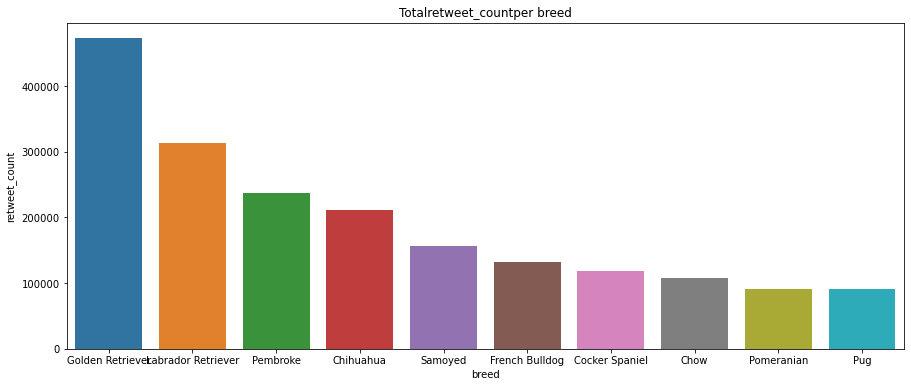

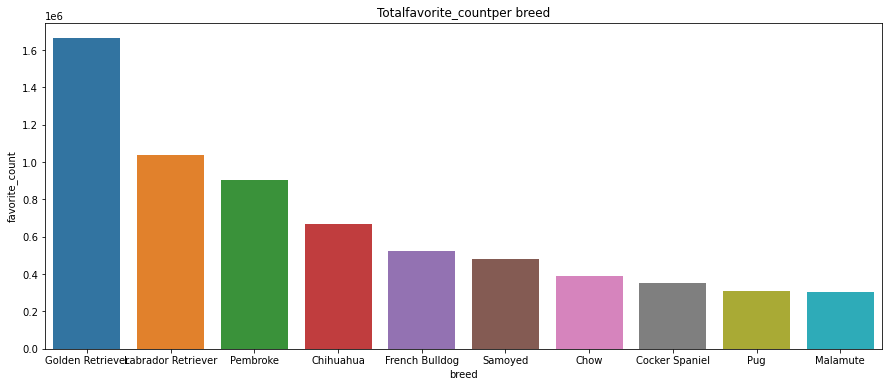

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df_breed_total = twitter_archive_master.groupby('breed').agg({'retweet_count': 'sum', 'favorite_count': 'sum'}).reset_index()
# Check the top 5 breeds
for i in ['retweet_count','favorite_count']:
 print(i)
 print(df_breed_total.sort_values(by = i, ascending = False).head())
 fig, ax = plt.subplots(figsize = (15,6))
 ax = sns.barplot(x = 'breed', y = i, data = df_breed_total.sort_values(i, \
 ascending = False).iloc[:10])
 ax.set_title('Total' + i + 'per breed')